In [1]:
%load_ext autoreload
%autoreload 2

from tifffile import imread

from caImageAnalysis import BrukerFish, VolumeFish
from caImageAnalysis.mesm import * 
from caImageAnalysis.temporal import *
from caImageAnalysis.visualize import visualize_around_frame_multiple, visualize_images

### Change the exp_folder to the path of the experiment

In [69]:
# Change this path to the experiment folder
exp_folder = r'/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_14_20230913'

In [70]:
# Initialize the fish. 
# If custom 2P, use VolumeFish. If Bruker 2P, use BrukerFish.

# fish = VolumeFish(exp_folder)
fish = BrukerFish(exp_folder)
fish.data_paths

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(xml)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that usi

Batch exists. Loading batch.pickle


/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:158: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 158 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(log)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML pars

{'rotated': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_14_20230913/raw_rotated.tif'),
 'stytra': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_14_20230913/stytra'),
 'raw': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_14_20230913/vagal_L-000'),
 'frametimes': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_14_20230913/frametimes.txt'),
 'raw_image': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_14_20230913/ch2.tif'),
 'anatomy': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_14_20230913/anatomy.tif'),
 'mesmerize': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_14_20230913/mesmerize-batch'),
 'temporal': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_14_20230913/temporal.h5'),
 'vol_temporal': PosixPath('/Volumes/Rapid/bruker2P

In [62]:
# Save the final temporal responses under postgavage_path/temporal.h5
# Gives errors when you run it back to back
# If it gives an error, restart the kernel and run it again
save_temporal(fish)

Batch exists. Loading batch.pickle
finished plane 0
finished plane 1
finished plane 2
finished plane 3
finished plane 4


/Users/minelarinel/caImageAnalysis/caImageAnalysis/temporal.py:66: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['raw_temporal', 'temporal', 'raw_dff', 'roi_indices', 'pulse_frames'], dtype='object')]

  temporal_df.to_hdf(fish.exp_path.joinpath('temporal.h5'), key='temporal')
/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument '

Batch exists. Loading batch.pickle


In [63]:
# Temporal dataframe
fish.temporal_df

plane                                       raw_temporal  \
0      0  [[118.43701325278045, 113.51108840500592, 107....   
1      1  [[12.095128596325202, -15.393871559801617, -23...   
2      2  [[59.48444173473776, 11.799418189123402, 10.93...   
3      3  [[201.98528242560897, 107.34818475195965, 138....   
4      4  [[-42.78381539732531, -35.56692643612811, -59....   

                                            temporal  \
0  [[131.0917070516624, 122.55630856810825, 114.4...   
1  [[-6.174618666176384, -6.174618666176384, -6.1...   
2  [[19.956832034737285, 14.606554601114915, 9.66...   
3  [[150.1842424183065, 135.29921635443293, 121.7...   
4  [[-30.183569100391566, -30.183569100391566, -3...   

                                             raw_dff  \
0  [[1.1372491966200424, 1.0620641698296296, 0.97...   
1  [[0.15034413784108228, -0.09028792589163309, -...   
2  [[0.2857813742270121, 0.14613131281491146, 0.1...   
3  [[0.7590689006790592, 0.38950831087582377, 0.5...   
4  [[-0.032353340001468944, -0.01019486518380184,...   

                        roi_indices                pulse_frames  
0          [10, 11, 12, 13, 15, 16]  [392, 548, 705, 861, 1018]  
1      [13, 16, 17, 18, 19, 22, 23]  [391, 548, 704, 861, 1017]  
2  [13, 16, 17, 18, 19, 20, 21, 24]  [391, 548, 704, 861, 1017]  
3          [13, 15, 16, 19, 20, 24]  [391, 548, 704, 861, 1017]  
4              [20, 21, 22, 24, 28]  [391, 547, 704, 860, 1017]

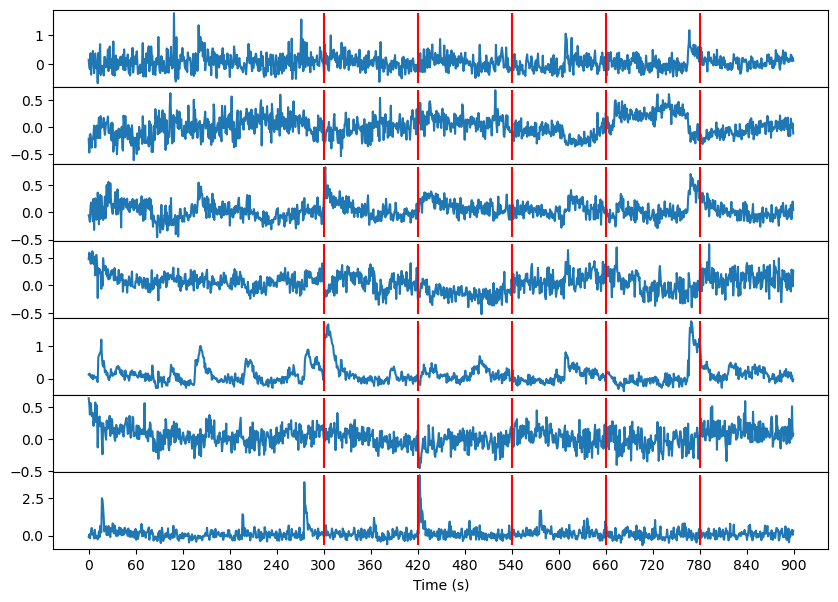

In [64]:
# Plot the individual dF/F traces per plane
plane = 1

plot_temporal(fish, plane, heatmap=False, key='raw_dff')

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(xml)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that usi

Batch exists. Loading batch.pickle


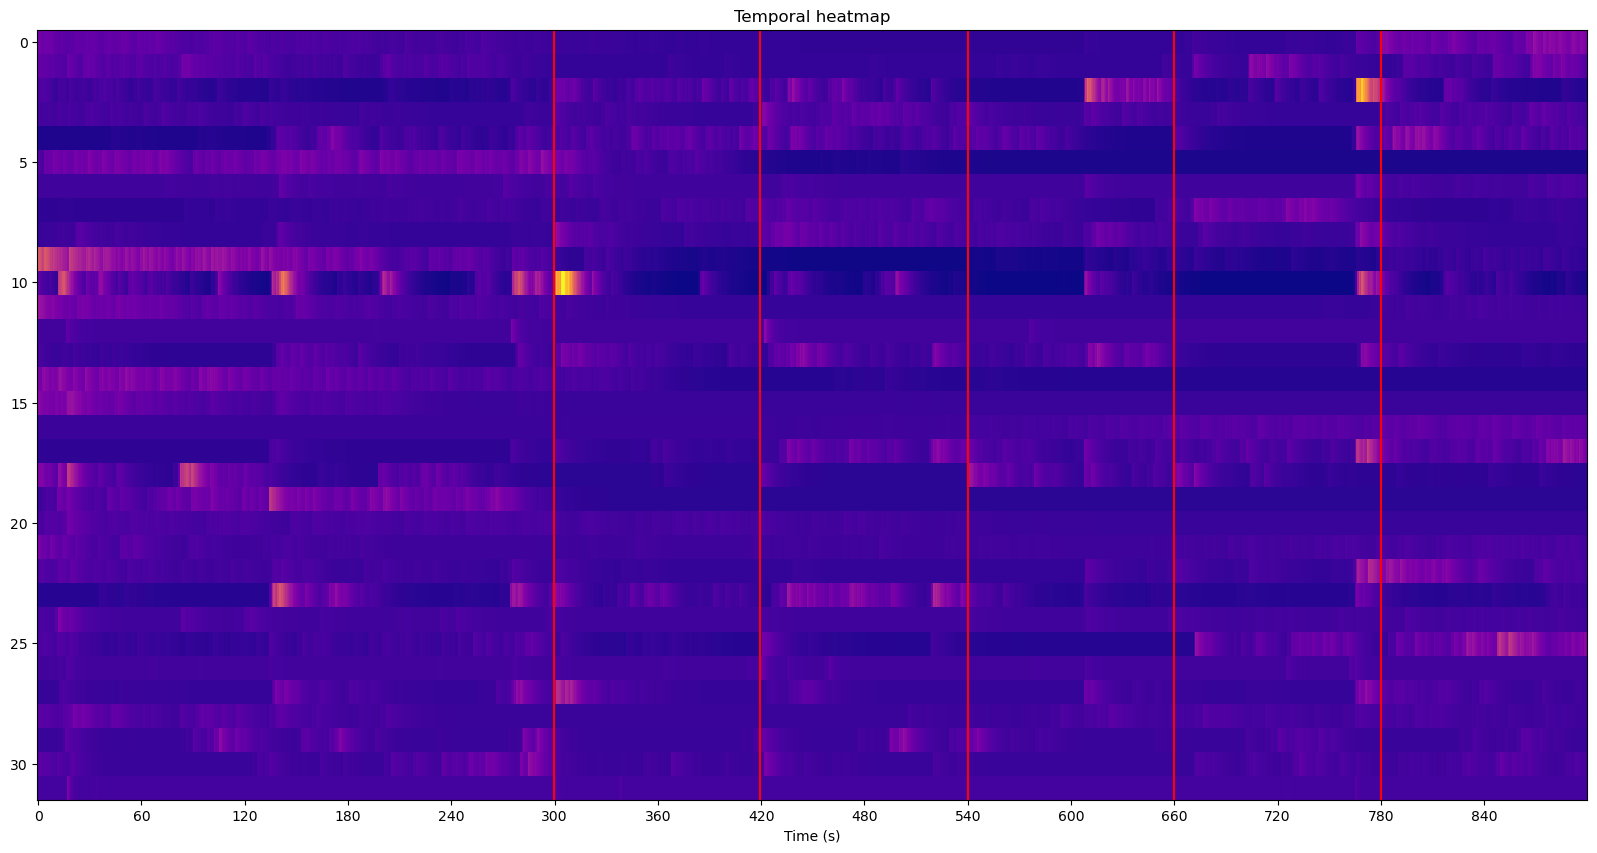

In [65]:
# Plot the individual dF/F traces of the entire volume as a heatmap
plot_temporal_volume(fish, key='raw_dff')

### Find twitch events

Batch exists. Loading batch.pickle


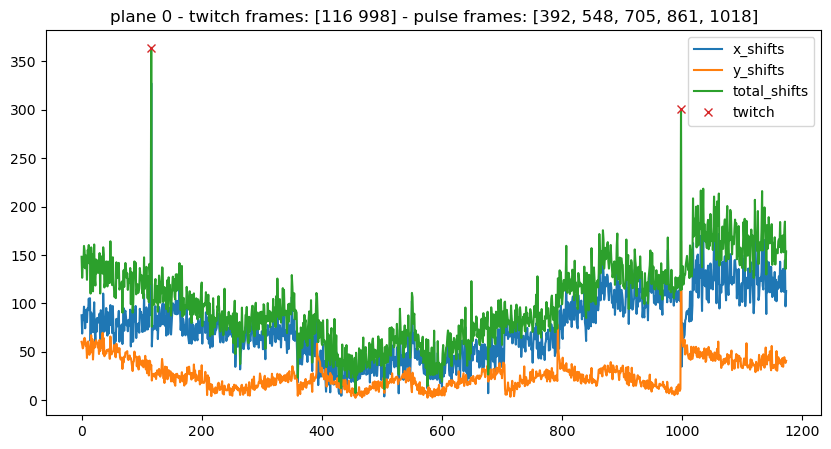

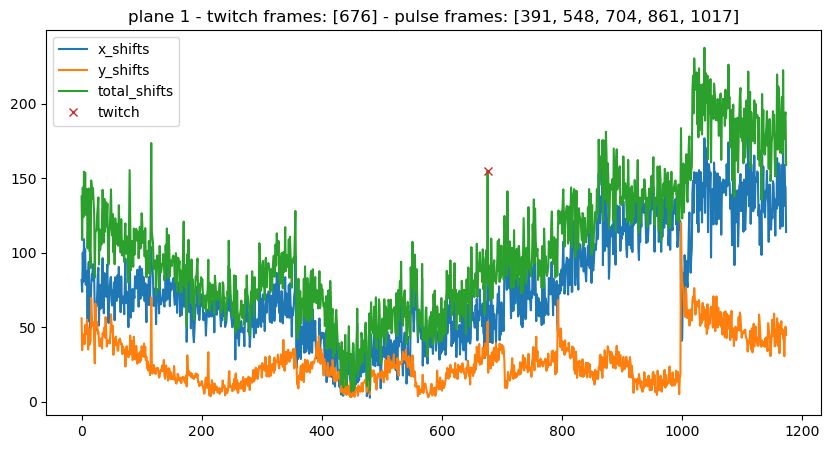

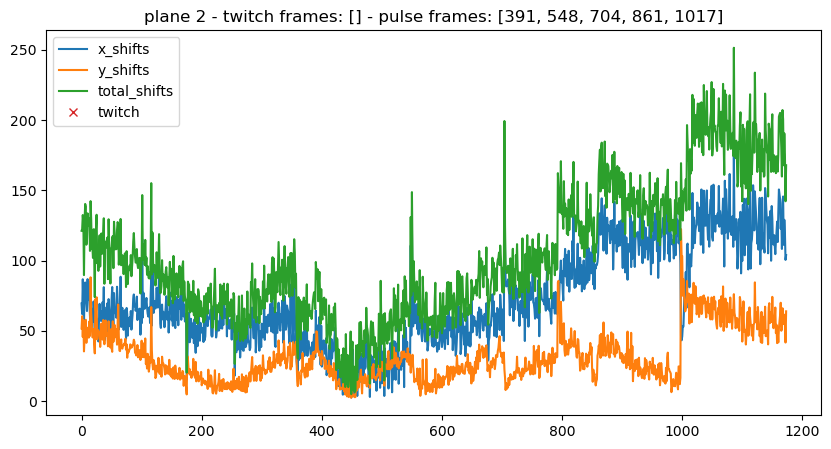

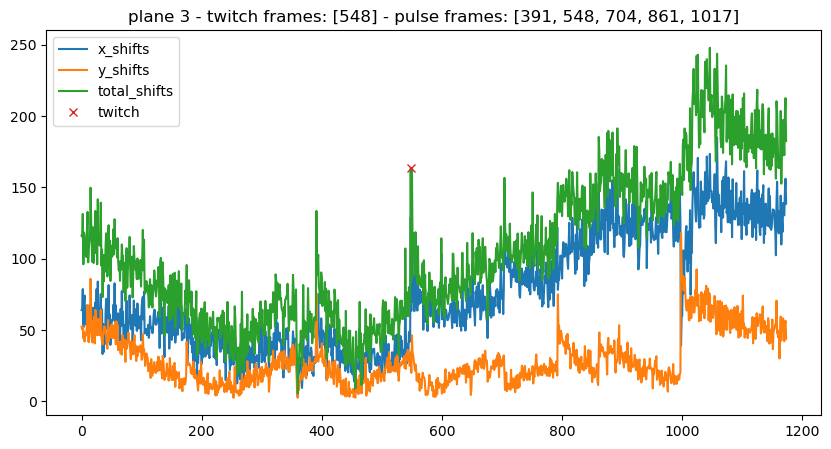

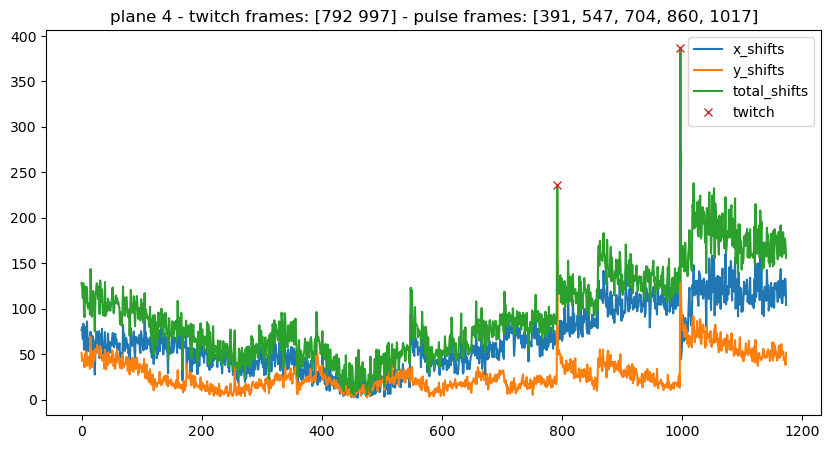

In [159]:
peaks = find_twitches(fish, plot=True, threshold=75)  # threshold: the vertical distance to its neighboring samples

In [178]:
# Confirm the twitch events
# On the ImageWidget, the twitch will occur at t=n_frames_pre
iw = visualize_around_frame_multiple(fish, peaks, n_frames_pre=3, n_frames_post=3)
iw.show()

RFBOutputContext()

In [179]:
iw.plot.canvas.close()

### Detrend dF/F on denoised data

In [66]:
# Compute the dF/F signal for each component
# Takes the F0 as the median of baseline, which is from the beginning of the recording 
# to the time before the first pulse
df = compute_median_dff(fish, window=100)
df

/Users/minelarinel/caImageAnalysis/caImageAnalysis/temporal.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish.temporal_df['dff'][i] = dffs
/Users/minelarinel/caImageAnalysis/caImageAnalysis/temporal.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish.temporal_df['dff'][i] = dffs
/Users/minelarinel/caImageAnalysis/caImageAnalysis/temporal.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish.temporal_df['dff'][i] = 

plane                                       raw_temporal  \
0      0  [[118.43701325278045, 113.51108840500592, 107....   
1      1  [[12.095128596325202, -15.393871559801617, -23...   
2      2  [[59.48444173473776, 11.799418189123402, 10.93...   
3      3  [[201.98528242560897, 107.34818475195965, 138....   
4      4  [[-42.78381539732531, -35.56692643612811, -59....   

                                            temporal  \
0  [[131.0917070516624, 122.55630856810825, 114.4...   
1  [[-6.174618666176384, -6.174618666176384, -6.1...   
2  [[19.956832034737285, 14.606554601114915, 9.66...   
3  [[150.1842424183065, 135.29921635443293, 121.7...   
4  [[-30.183569100391566, -30.183569100391566, -3...   

                                             raw_dff  \
0  [[1.1372491966200424, 1.0620641698296296, 0.97...   
1  [[0.15034413784108228, -0.09028792589163309, -...   
2  [[0.2857813742270121, 0.14613131281491146, 0.1...   
3  [[0.7590689006790592, 0.38950831087582377, 0.5...   
4  [[-0.032353340001468944, -0.01019486518380184,...   

                        roi_indices                pulse_frames  \
0          [10, 11, 12, 13, 15, 16]  [392, 548, 705, 861, 1018]   
1      [13, 16, 17, 18, 19, 22, 23]  [391, 548, 704, 861, 1017]   
2  [13, 16, 17, 18, 19, 20, 21, 24]  [391, 548, 704, 861, 1017]   
3          [13, 15, 16, 19, 20, 24]  [391, 548, 704, 861, 1017]   
4              [20, 21, 22, 24, 28]  [391, 547, 704, 860, 1017]   

                                                 dff  
0  [[0.8150556239843261, 0.6968771108735243, 0.58...  
1  [[-0.0003857626701363859, -0.00038576267013638...  
2  [[1.8699275168568057, 1.6367064548052415, 1.42...  
3  [[2.39139166680105, 2.0552648365805184, 1.7493...  
4  [[-0.3076120757286239, -0.3076120757286239, -0...

### Normalize between 0 and 1

In [67]:
# Normalize each trace between 0 and 1
norm_df = normalize_dff(fish)
norm_df

/Users/minelarinel/caImageAnalysis/caImageAnalysis/temporal.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/minelarinel/caImageAnalysis/caImageAnalysis/temporal.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def cluster_temporal(fish, max_inter_cluster_dist, sort=True, savefig=False):
/Users/minelarinel/caImageAnalysis/caImageAnalysis/temporal.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/minelarine

plane                                       raw_temporal  \
0      0  [[118.43701325278045, 113.51108840500592, 107....   
1      1  [[12.095128596325202, -15.393871559801617, -23...   
2      2  [[59.48444173473776, 11.799418189123402, 10.93...   
3      3  [[201.98528242560897, 107.34818475195965, 138....   
4      4  [[-42.78381539732531, -35.56692643612811, -59....   

                                            temporal  \
0  [[131.0917070516624, 122.55630856810825, 114.4...   
1  [[-6.174618666176384, -6.174618666176384, -6.1...   
2  [[19.956832034737285, 14.606554601114915, 9.66...   
3  [[150.1842424183065, 135.29921635443293, 121.7...   
4  [[-30.183569100391566, -30.183569100391566, -3...   

                                             raw_dff  \
0  [[1.1372491966200424, 1.0620641698296296, 0.97...   
1  [[0.15034413784108228, -0.09028792589163309, -...   
2  [[0.2857813742270121, 0.14613131281491146, 0.1...   
3  [[0.7590689006790592, 0.38950831087582377, 0.5...   
4  [[-0.032353340001468944, -0.01019486518380184,...   

                        roi_indices                pulse_frames  \
0          [10, 11, 12, 13, 15, 16]  [392, 548, 705, 861, 1018]   
1      [13, 16, 17, 18, 19, 22, 23]  [391, 548, 704, 861, 1017]   
2  [13, 16, 17, 18, 19, 20, 21, 24]  [391, 548, 704, 861, 1017]   
3          [13, 15, 16, 19, 20, 24]  [391, 548, 704, 861, 1017]   
4              [20, 21, 22, 24, 28]  [391, 547, 704, 860, 1017]   

                                                 dff  \
0  [[0.8150556239843261, 0.6968771108735243, 0.58...   
1  [[-0.0003857626701363859, -0.00038576267013638...   
2  [[1.8699275168568057, 1.6367064548052415, 1.42...   
3  [[2.39139166680105, 2.0552648365805184, 1.7493...   
4  [[-0.3076120757286239, -0.3076120757286239, -0...   

                                            norm_dff  \
0  [[0.6907998642010138, 0.6563427391323327, 0.62...   
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2  [[0.2612057563411653, 0.2411875492267726, 0.22...   
3  [[1.0, 0.9100352923711655, 0.828164264739729, ...   
4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                        raw_norm_dff  
0  [[1.0, 0.972429305151014, 0.9410156314368271, ...  
1  [[0.3338166633169015, 0.23254442348277693, 0.2...  
2  [[0.7410125061585582, 0.5716863199395473, 0.56...  
3  [[0.7948735342987092, 0.624992452769842, 0.680...  
4  [[0.18893179086948958, 0.1980277120760347, 0.1...

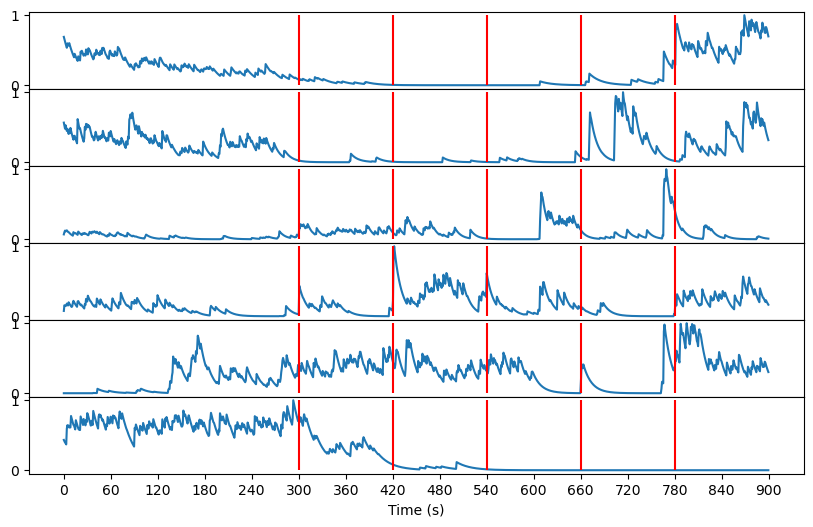

In [36]:
# Plot the individual normalized dF/F traces per plane
plane = 0

plot_temporal(fish, plane, heatmap=False, key='norm_dff')

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(xml)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that usi

Batch exists. Loading batch.pickle


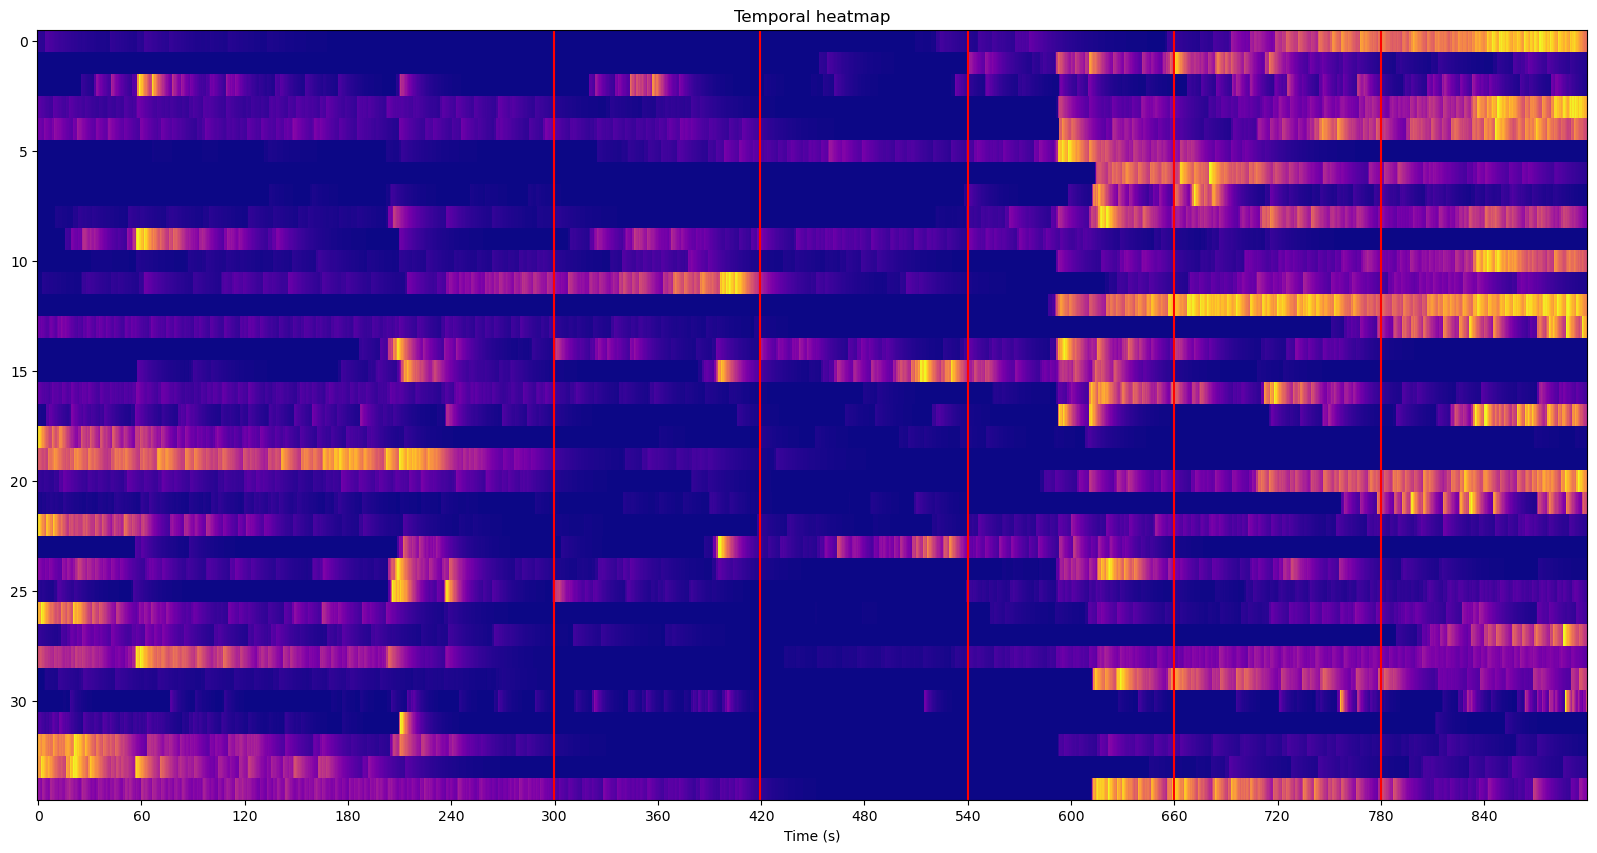

In [32]:
# Plot the individual normalized dF/F traces of the entire volume as a heatmap
plot_temporal_volume(fish, key='norm_dff')

## Cluster temporal responses

In [432]:
fish.vol_temporal.shape  # (# of components, frames)

(32, 1174)

Number of clusters: 4
Batch exists. Loading batch.pickle


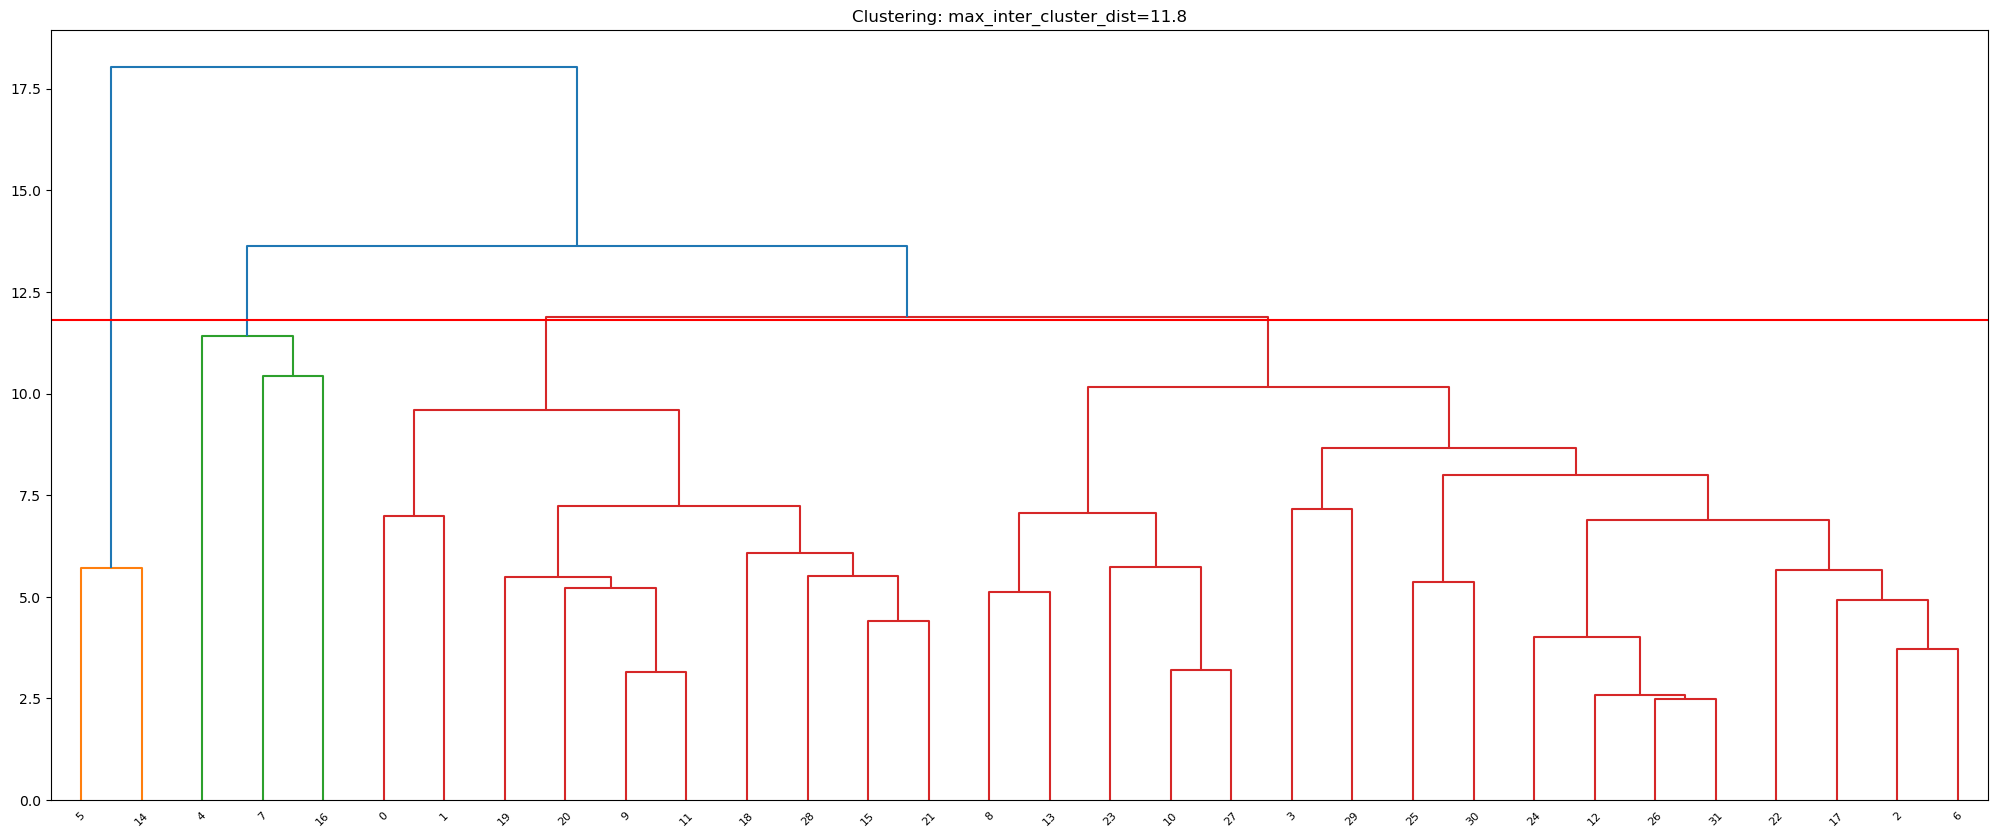

{'max_inter_cluster_dist': 11.8,
 'sort_inds': array([ 5, 14,  4,  7, 16,  0, 28, 21, 20, 19, 18, 15,  1,  9, 11, 12, 29,
        27, 26, 25, 24, 23,  2,  3,  6,  8, 17, 30, 10, 13, 22, 31]),
 'clusters': {4: [array([0., 0., 0., ..., 0., 0., 0.]),
   array([0.        , 0.        , 0.        , ..., 0.02101622, 0.01915387,
          0.01745654]),
   array([0.        , 0.        , 0.        , ..., 0.05504529, 0.05047538,
          0.04628487]),
   array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          8.70356703e-09, 6.21683359e-09, 4.97346687e-09]),
   array([0.19993549, 0.18744928, 0.17574284, ..., 0.50033029, 0.56888107,
          0.53335382]),
   array([0.03121191, 0.02840854, 0.18234622, ..., 0.02222716, 0.02023078,
          0.0184137 ]),
   array([0.        , 0.        , 0.        , ..., 0.08418652, 0.07769396,
          0.07170212]),
   array([0.06893258, 0.10092646, 0.12316   , ..., 0.01016088, 0.00919637,
          0.00832339]),
   array([0.07554165, 0.1570717 , 0

<Figure size 640x480 with 0 Axes>

In [440]:
# Cluster the temporal responses
max_inter_cluster_dist = 11.8  # Set the threshold for maximum inter-cluster distance allowed

cluster_temporal(fish, max_inter_cluster_dist, sort=True, savefig=True)

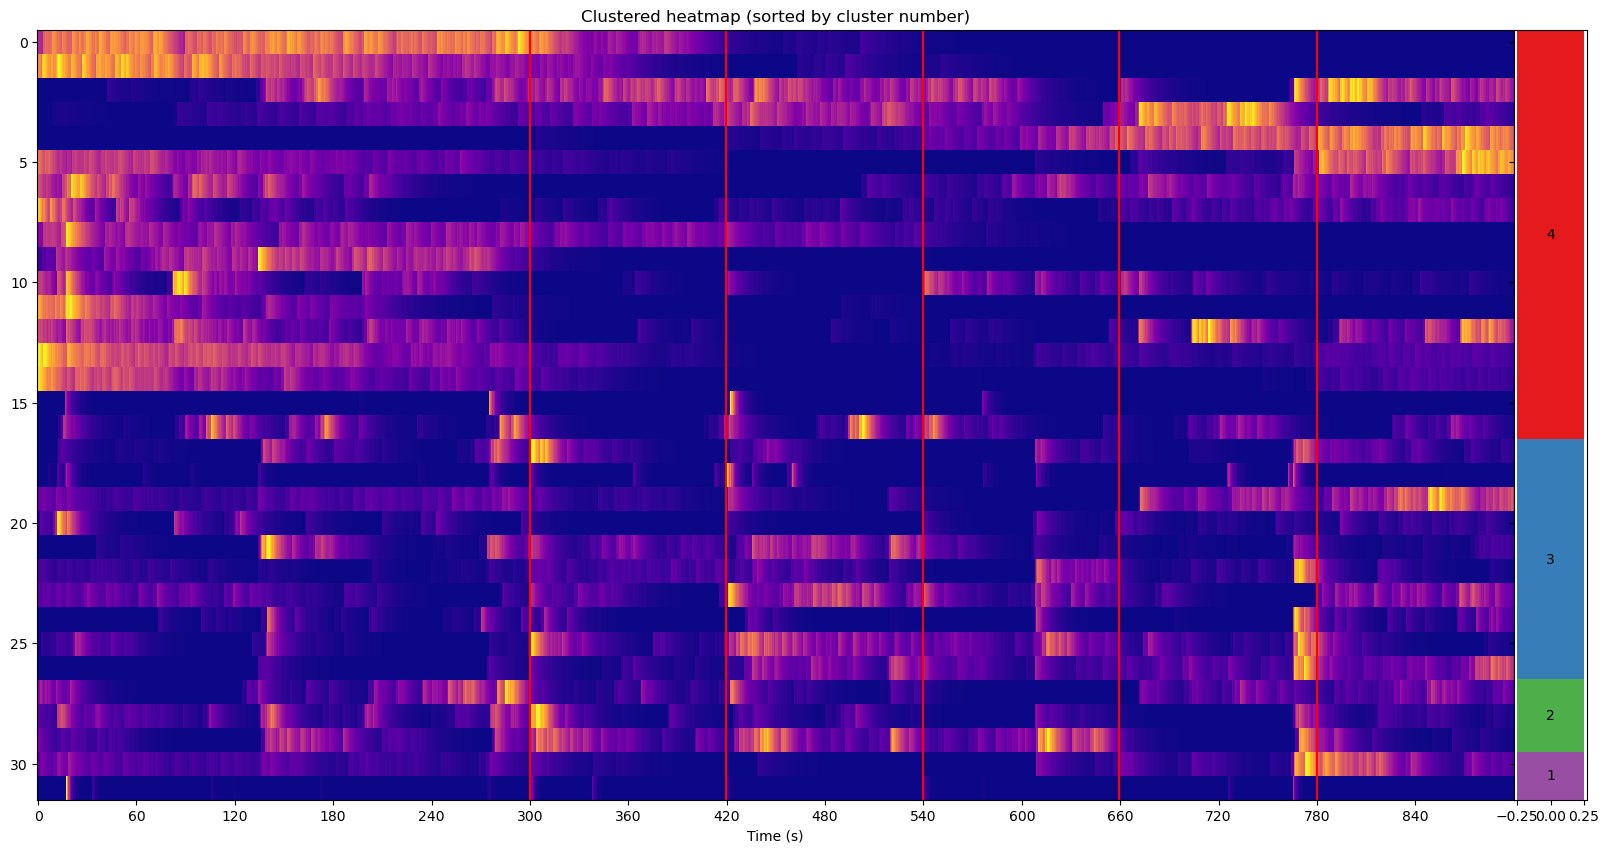

In [441]:
# Heatmap sorted by cluster number
data = fish.vol_temporal[fish.clusters['sort_inds']]
title = 'Clustered heatmap (sorted by cluster number)'
plot_temporal_volume(fish, data=data, title=title, clusters=fish.clusters['clusters'])

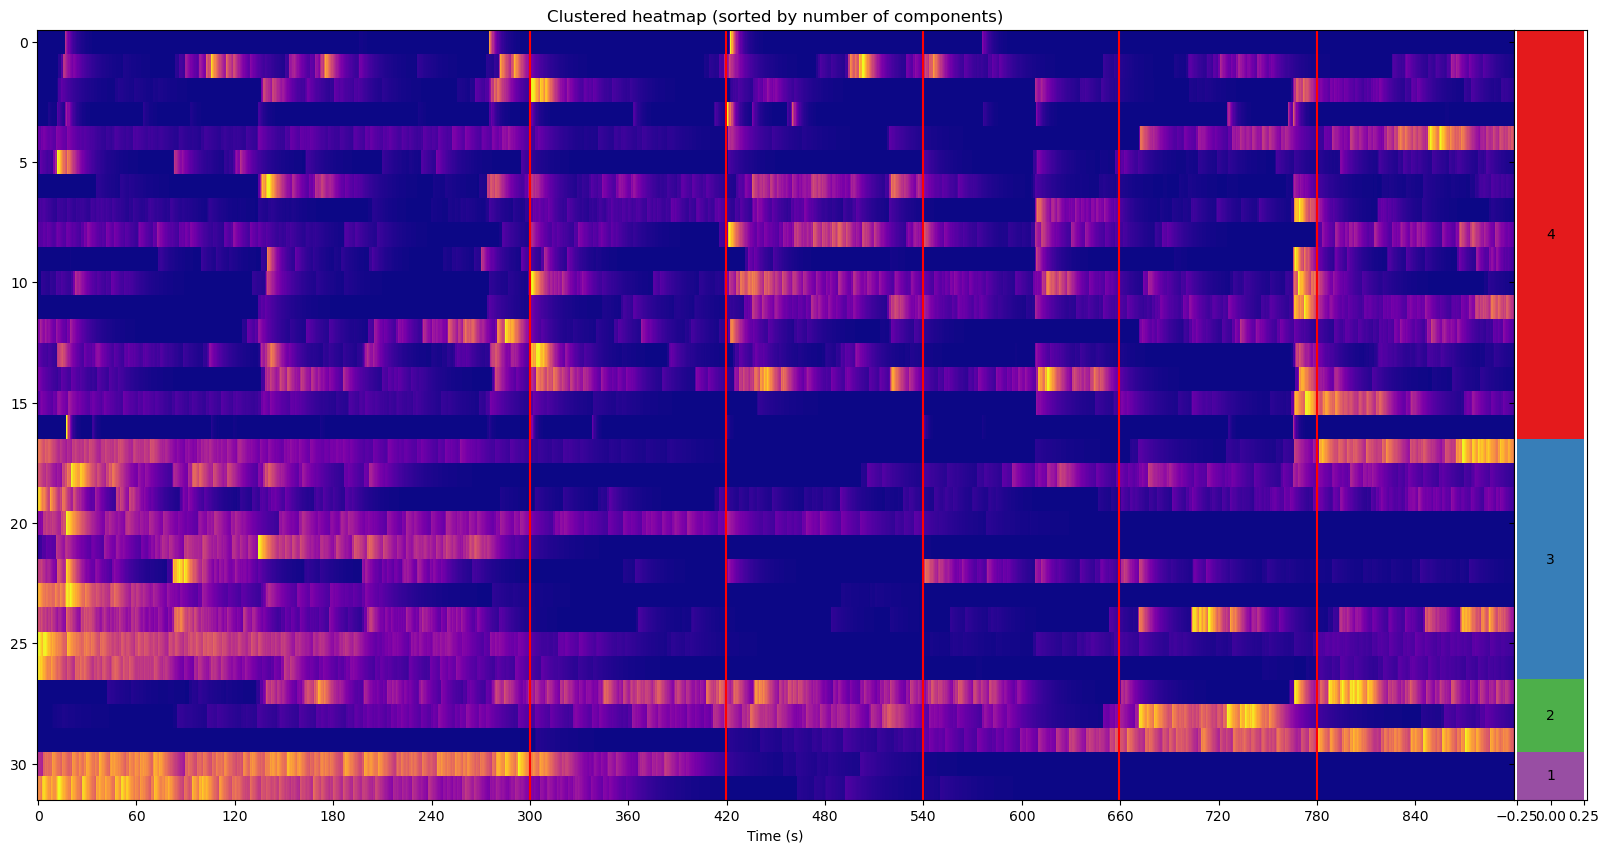

In [442]:
# Heatmap sorted by the number of components in cluster
data = sum(fish.clusters['clusters'].values(), [])
title = 'Clustered heatmap (sorted by number of components)'
plot_temporal_volume(fish, data=data, title=title, clusters=fish.clusters['clusters'])

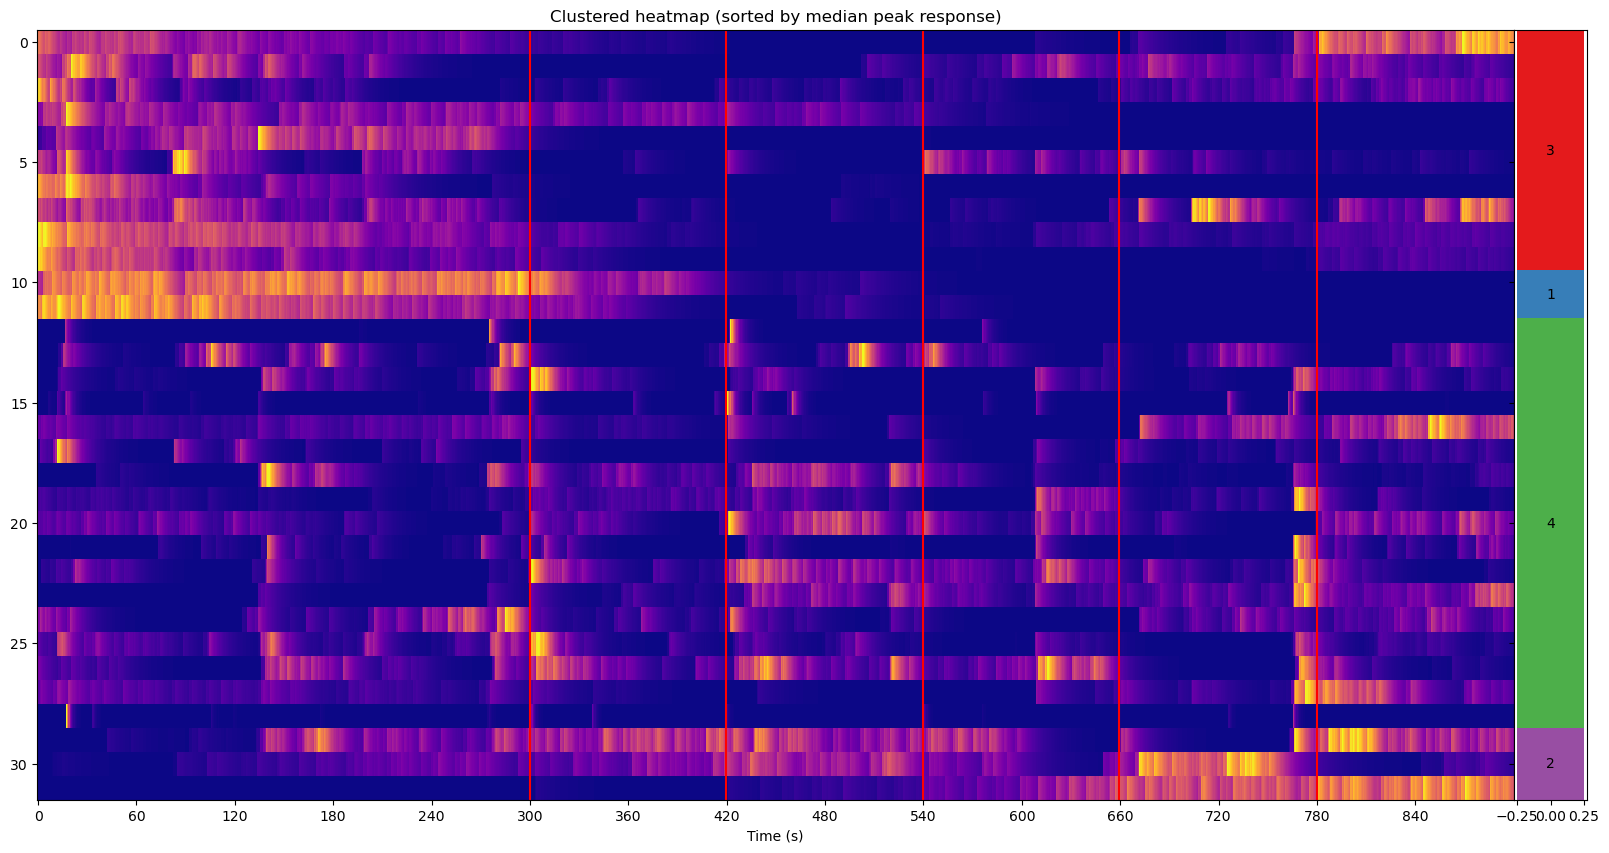

In [443]:
# Heatmap sorted by the median index of maximum peaks in a cluster
data = sum(fish.clusters['peak_clusters'].values(), [])
title = 'Clustered heatmap (sorted by median peak response)'
plot_temporal_volume(fish, data=data, title=title, clusters=fish.clusters['peak_clusters'], savefig=True)

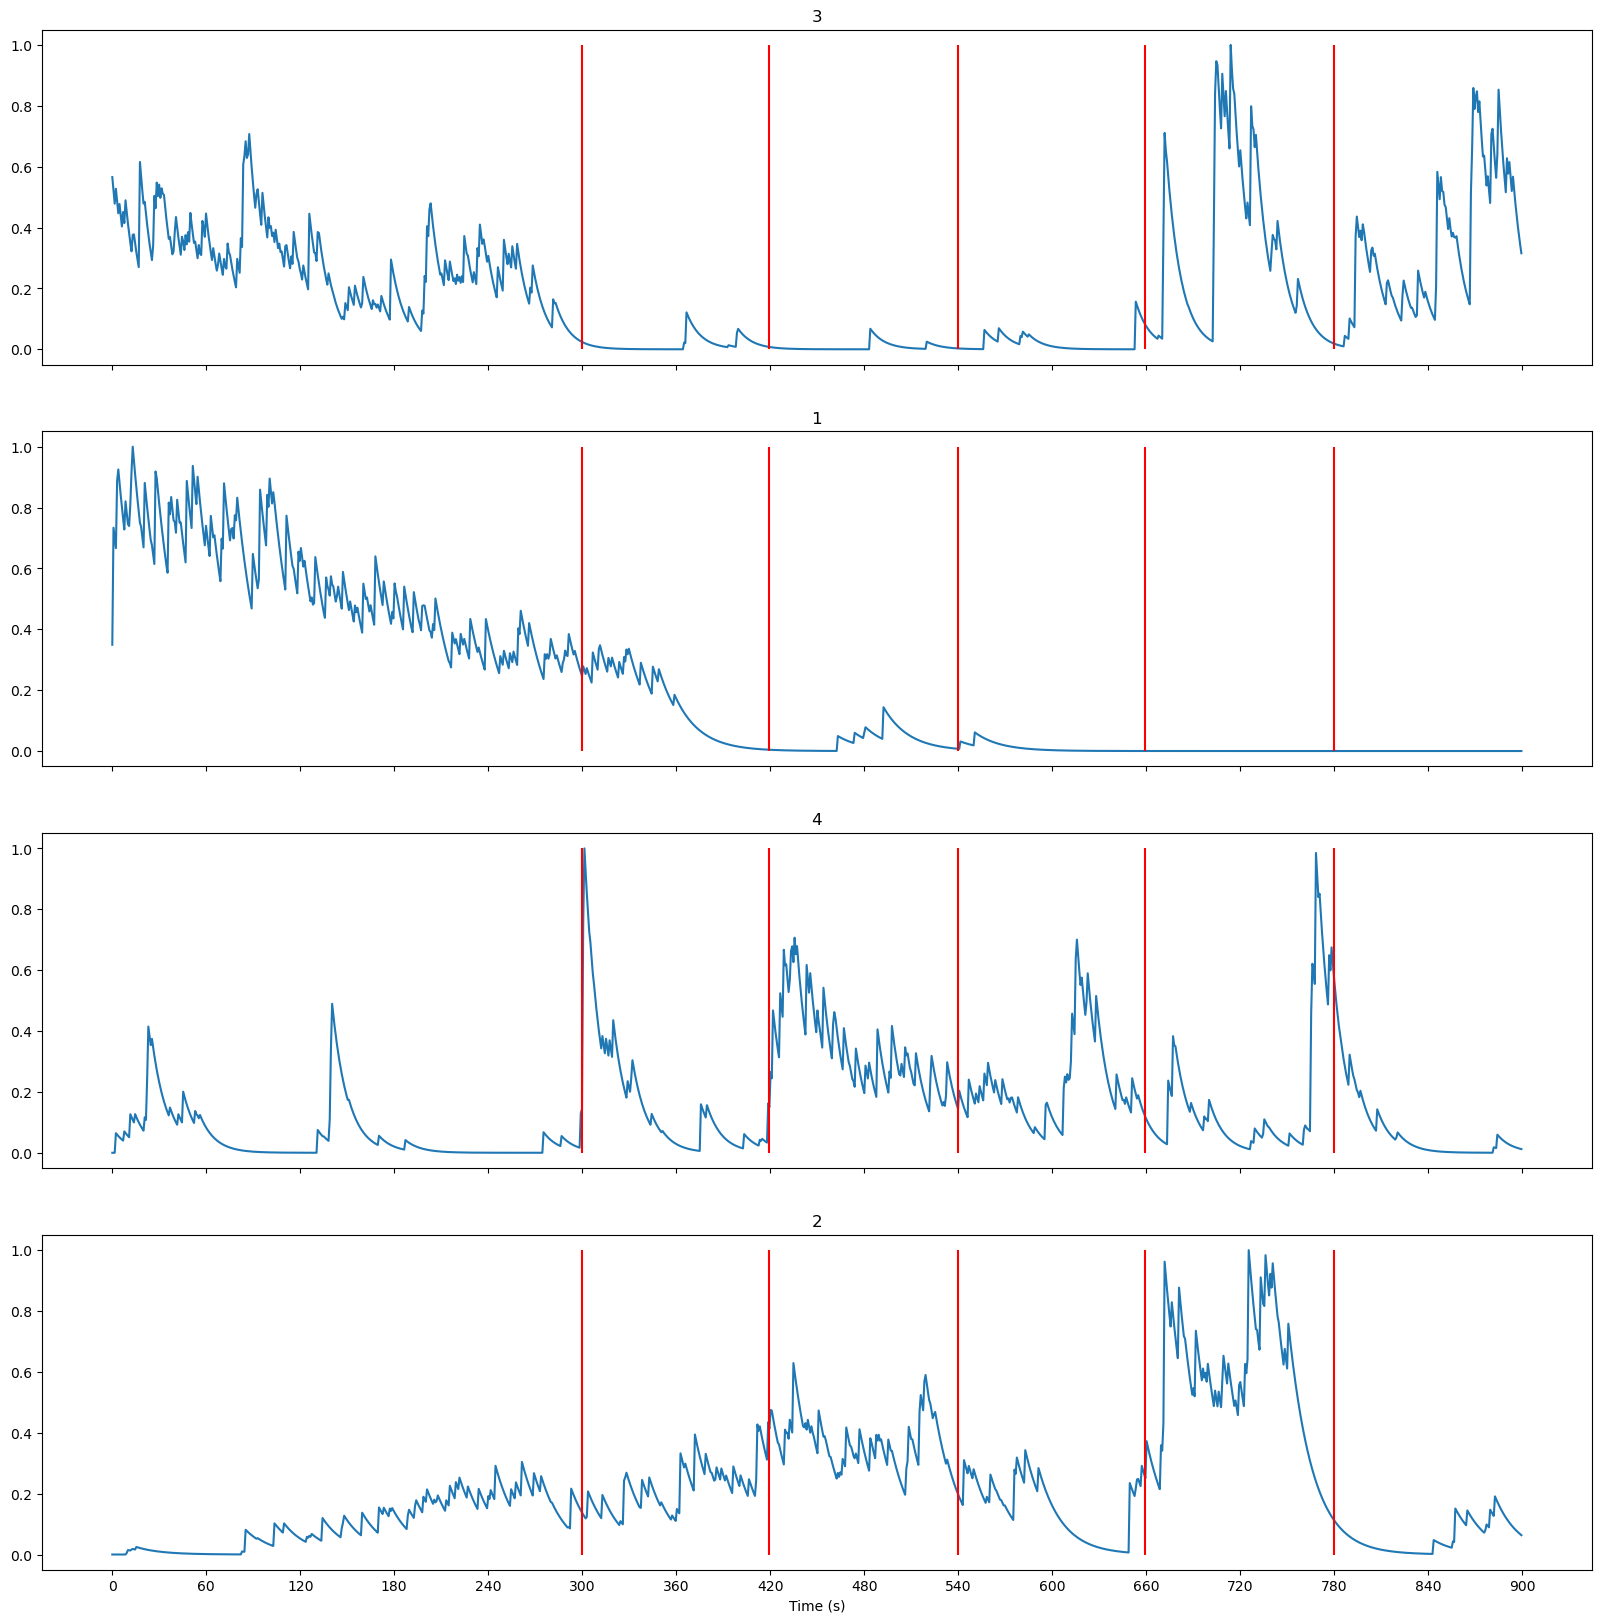

In [444]:
# Plot representative traces from each cluster
plot_representative_trace(fish, fish.clusters['peak_clusters'], savefig=True)

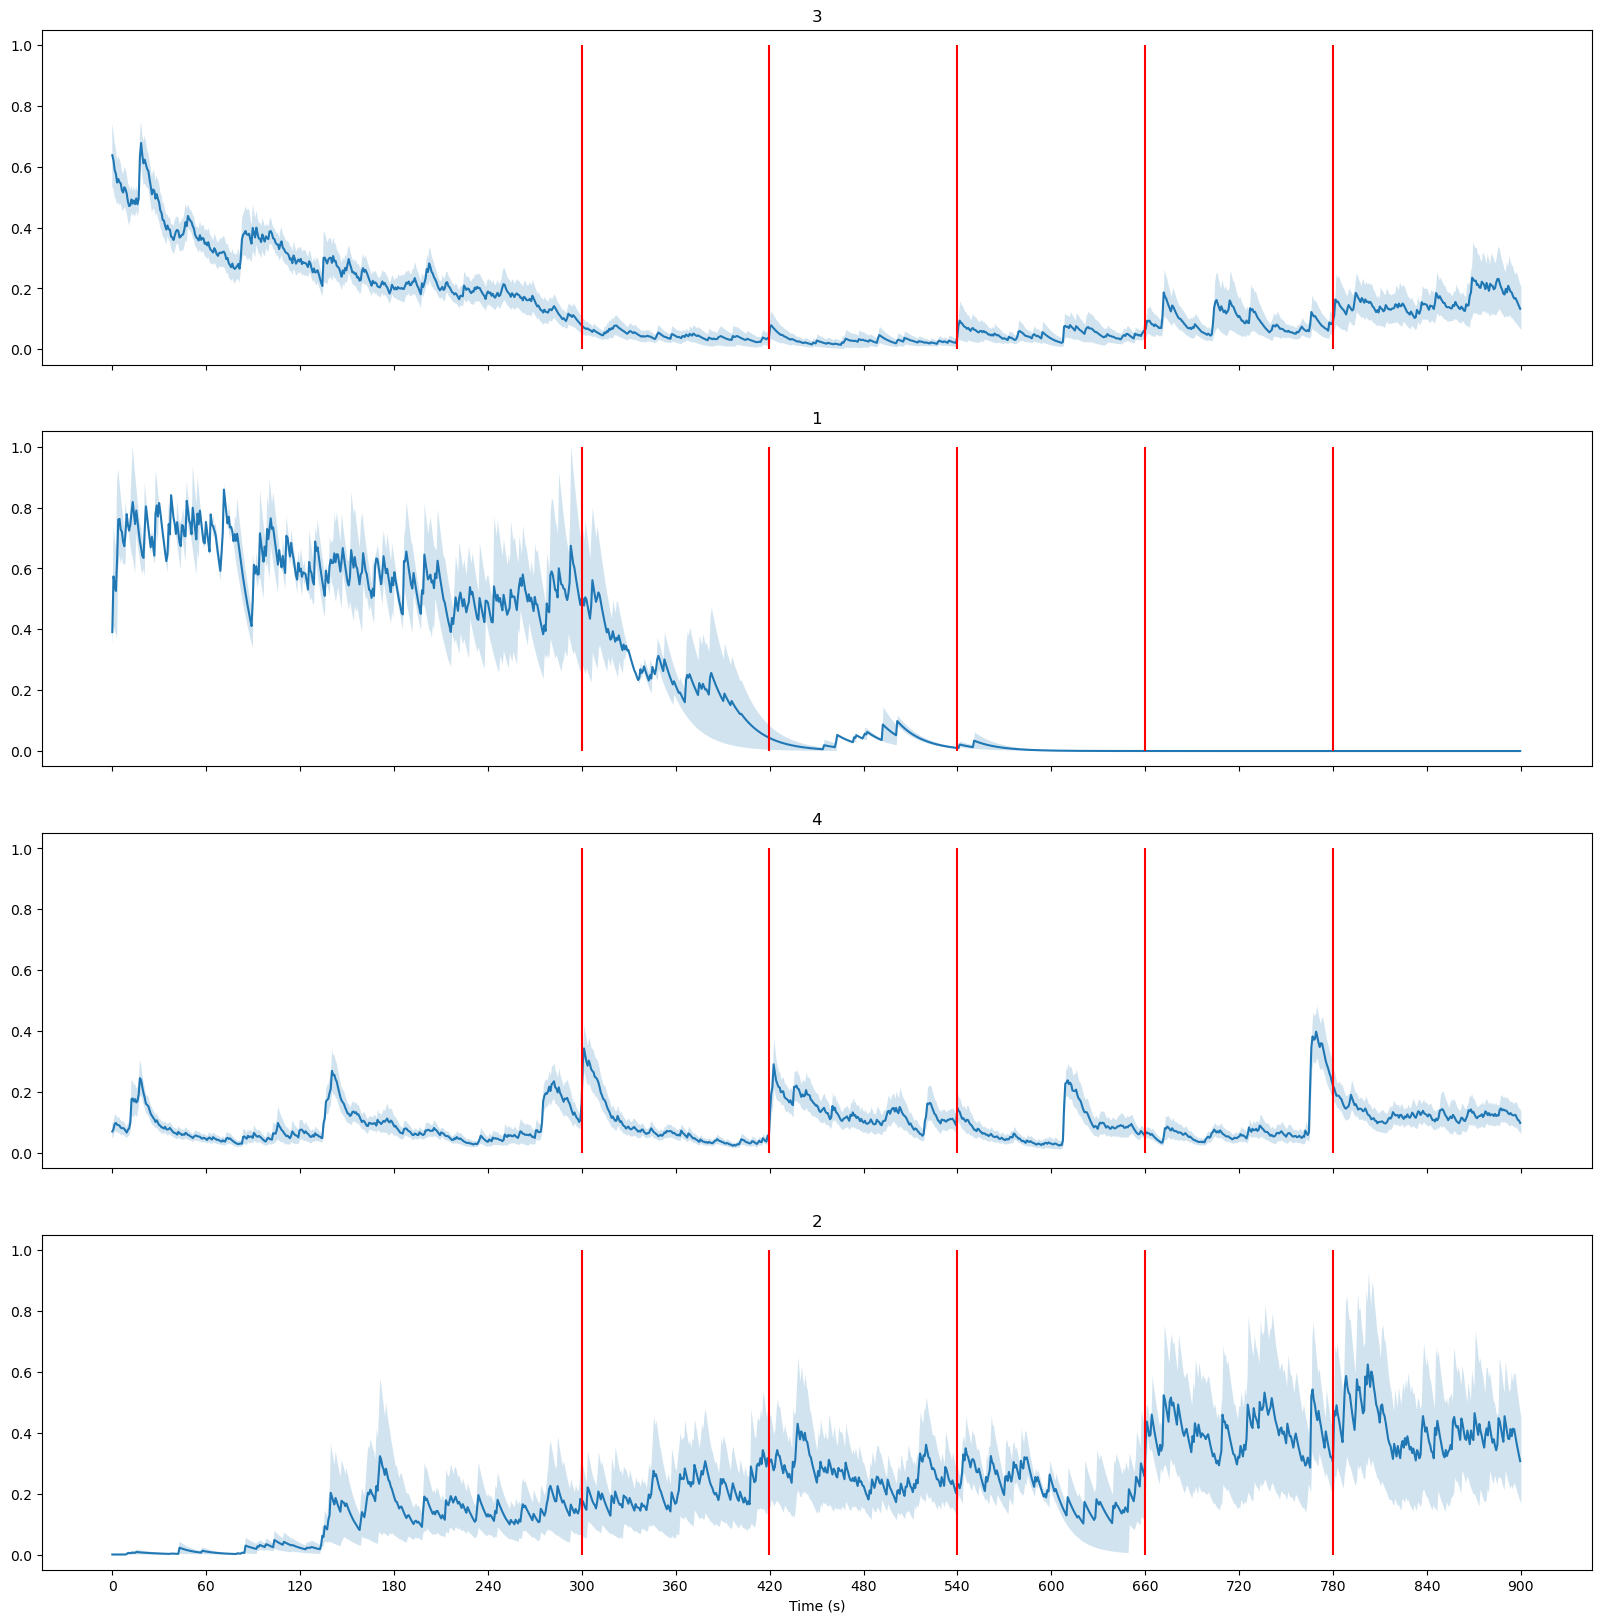

In [445]:
# Plot average traces from each cluster
plot_average_traces(fish, fish.clusters['peak_clusters'], savefig=True)

### Spatial organization of temporal clusters

In [446]:
# Visualize the anatomy stack for spatial representation
# Pick a plane to plot all spatial components on
# Also decide on a vmin-vmax value for visualization
anatomy_img = imread(fish.data_paths['anatomy'])
iw = visualize_images(anatomy_img)
iw.show()

RFBOutputContext()

In [378]:
iw.plot.canvas.close()

In [447]:
# Using the t above, set an index for the background anatomy image
index = 11

# Using the min-max above, set vmin and vmax values for better visualization of the image
vmin = -6
vmax = 56

img = anatomy_img[index]

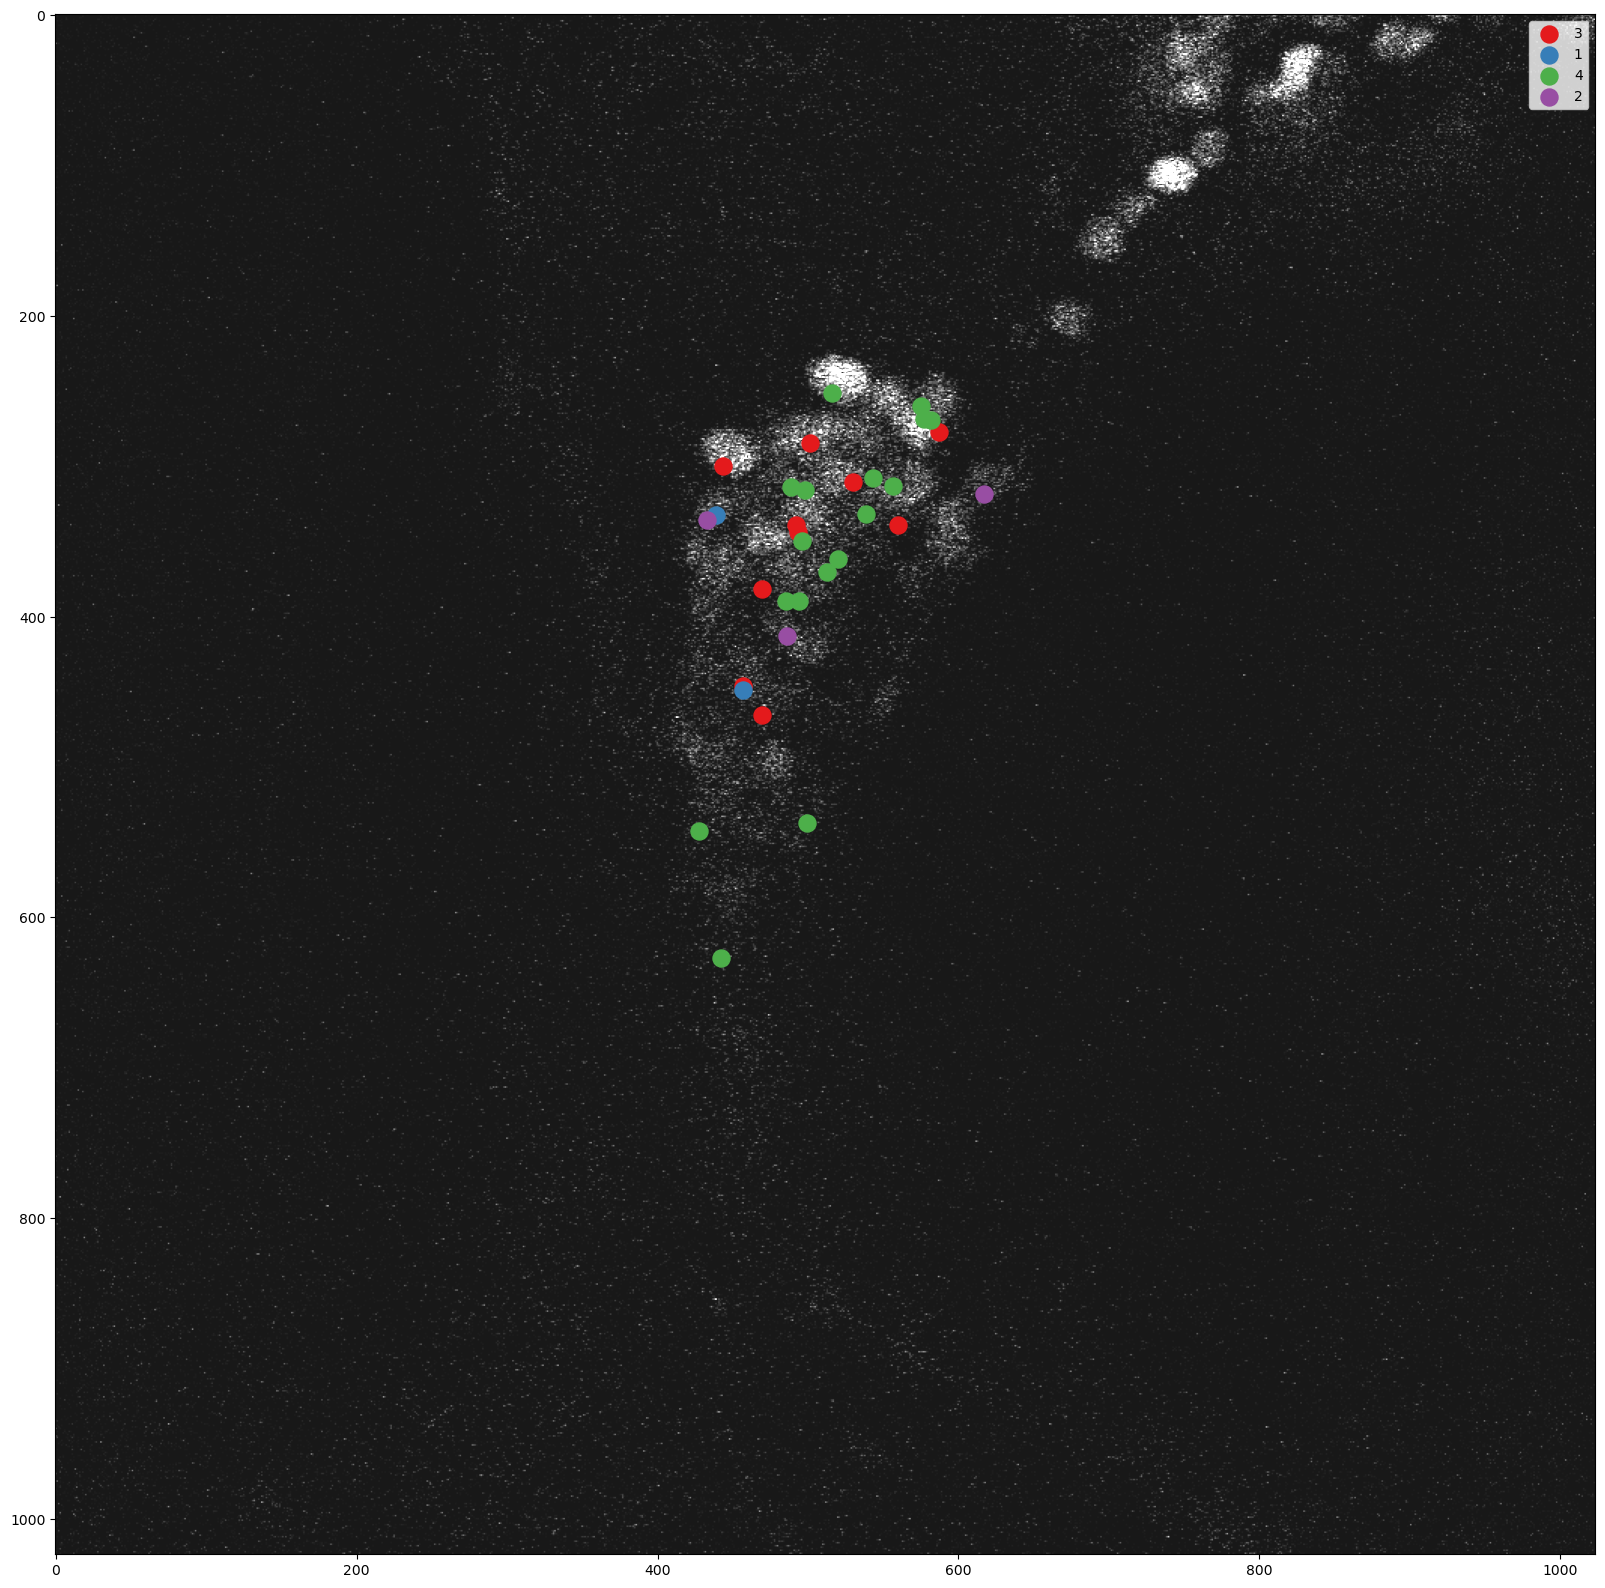

In [448]:
# Plot all components, color coded based on their cluster number
plot_spatial_overlayed(fish, img, vmin=vmin, vmax=vmax, savefig=True)

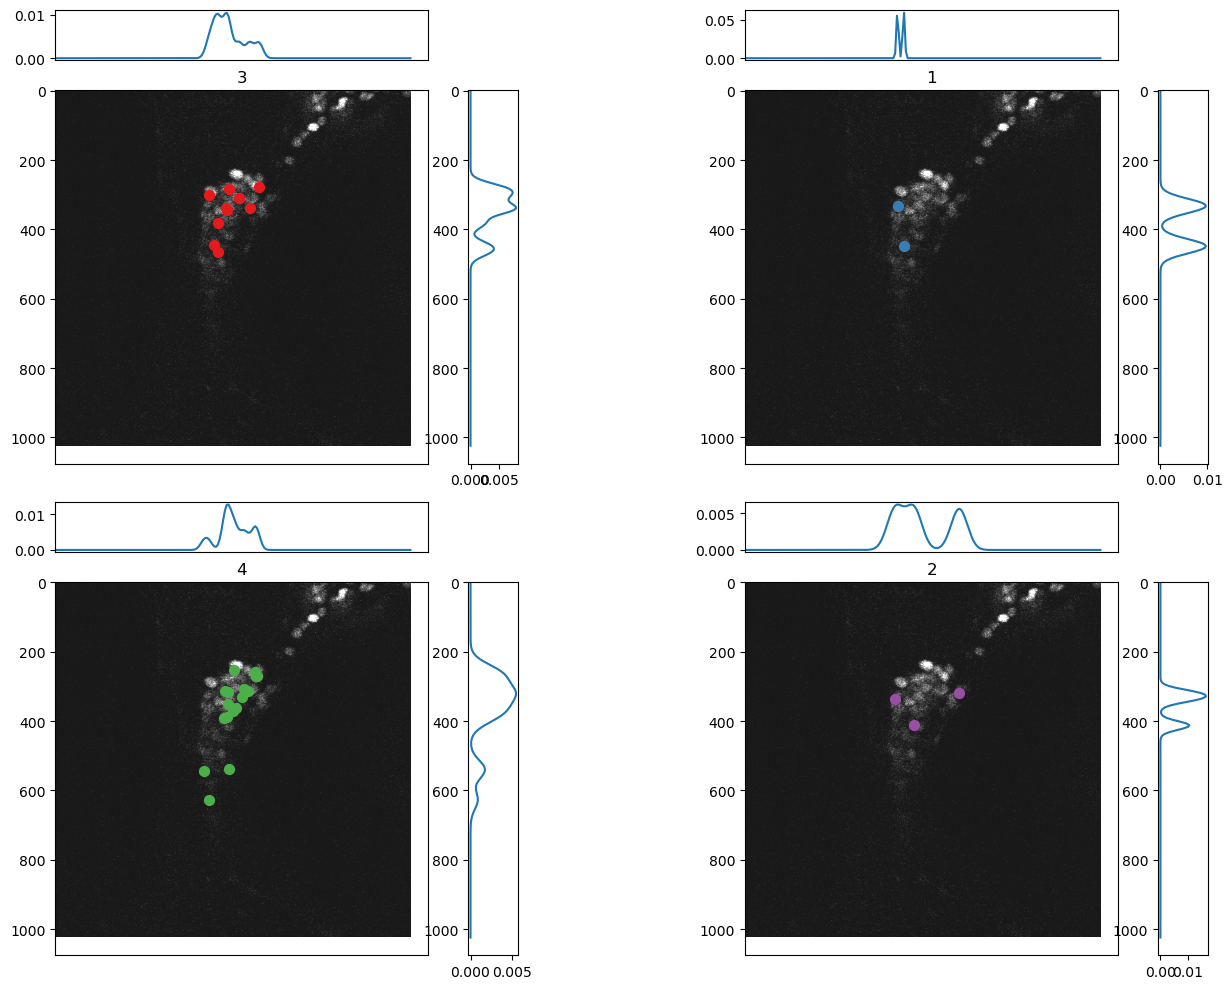

In [450]:
# Plot individual clusters on separately
plot_spatial_individual(fish, img, vmin=vmin, vmax=vmax, distribution=True, savefig=True)

neuron 0 is excitatory stimulus responsive
neuron 3 is excitatory stimulus responsive
neuron 7 is excitatory stimulus responsive
neuron 12 is excitatory stimulus responsive
neuron 13 is excitatory stimulus responsive
neuron 14 is excitatory stimulus responsive
neuron 16 is inhibitory stimulus responsive
neuron 17 is excitatory stimulus responsive
neuron 19 is inhibitory stimulus responsive
neuron 20 is excitatory stimulus responsive
neuron 22 is excitatory stimulus responsive
11 out of 24 neurons is stimulus responsive: 45.83333333333333%


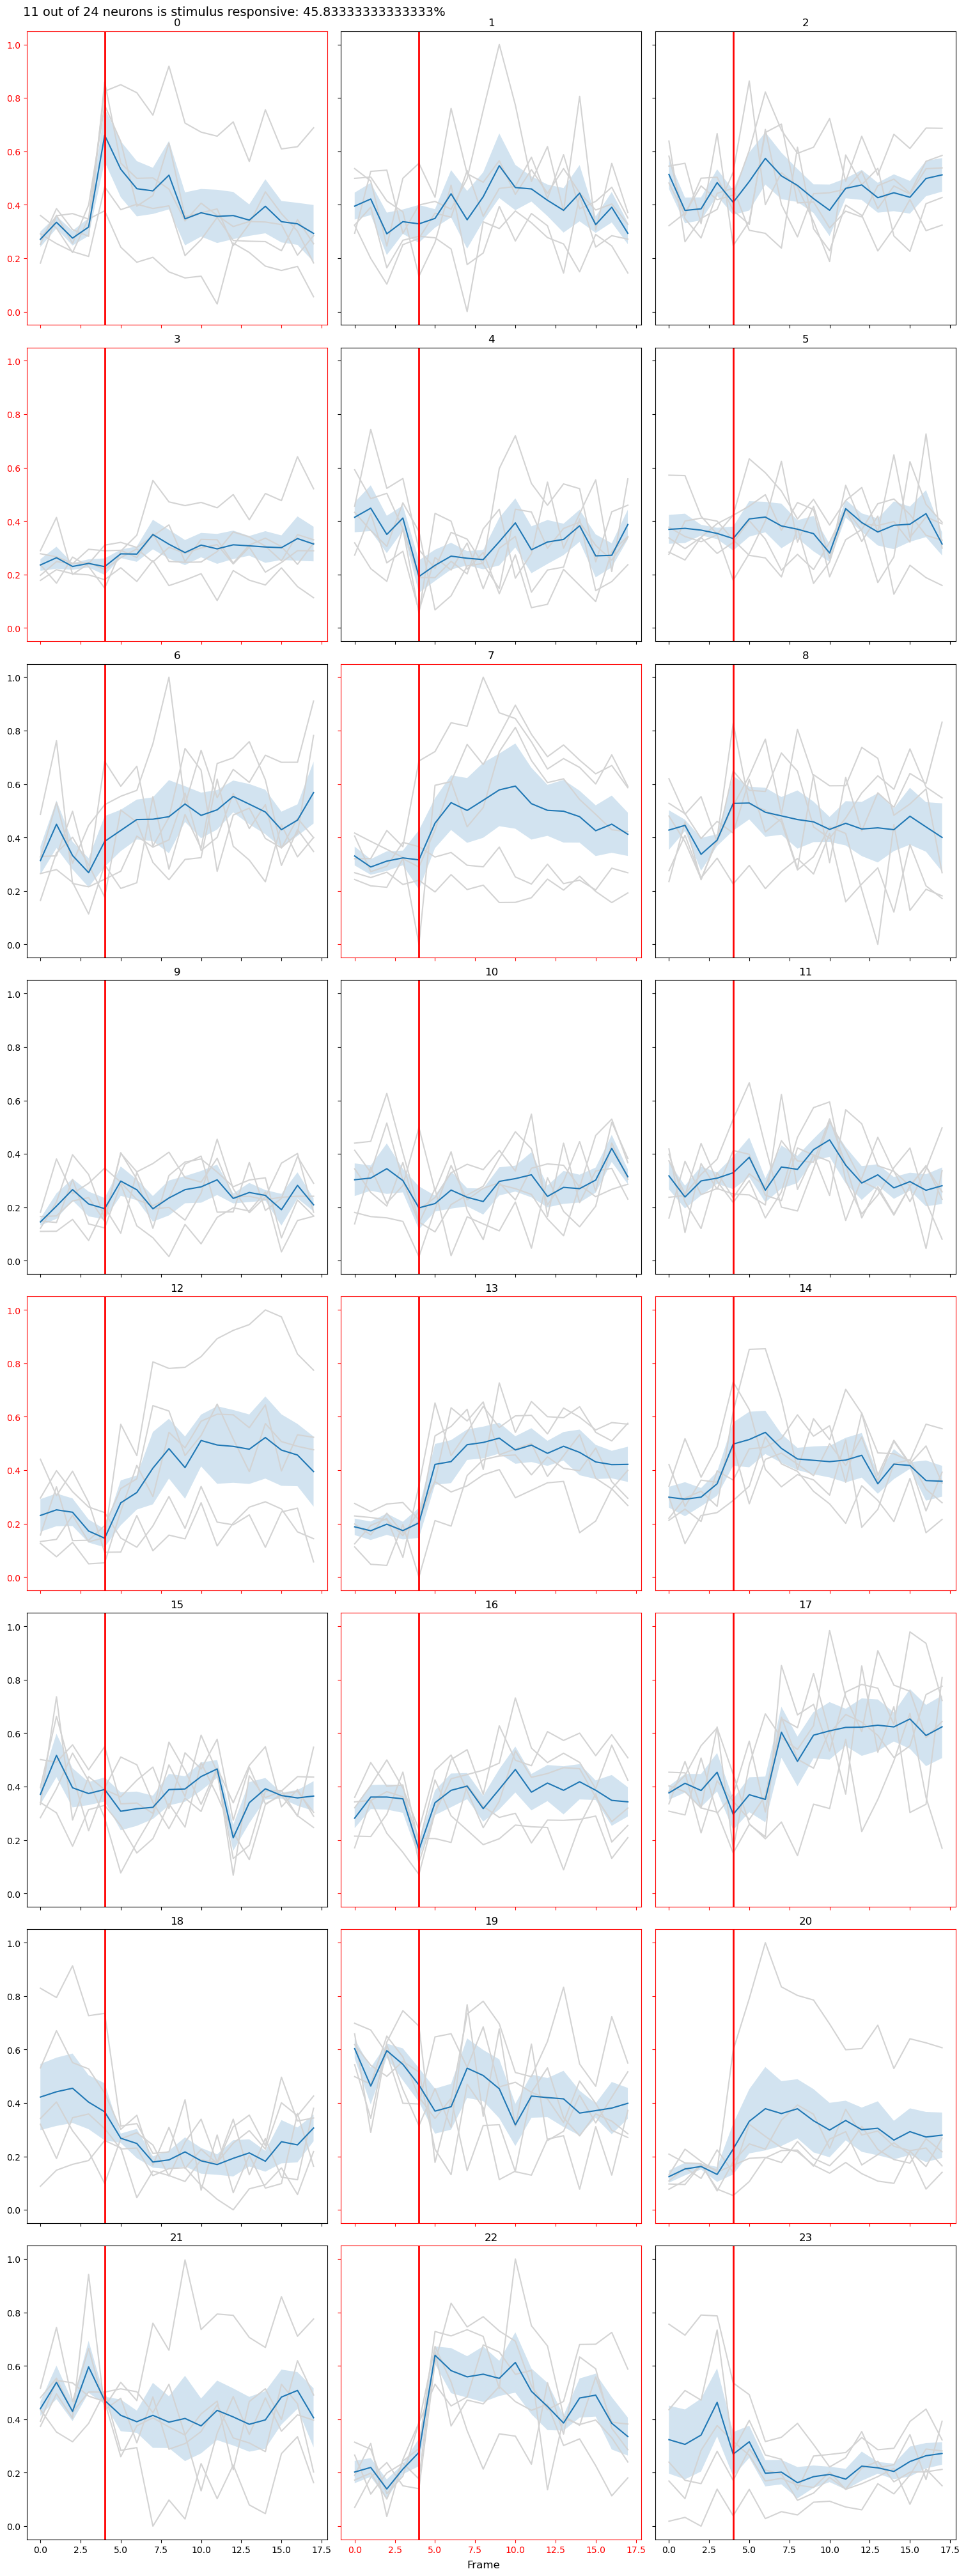

In [71]:
plot_neuron_pulse_average(fish, pre_frame_num=4, post_frame_num=13, savefig=True, key='raw_norm_dff')

## Stytra alignment

In [41]:
import json
with os.scandir(fish.data_paths['stytra']) as entries:
    for entry in entries:
        if 'behavior_log.csv' in entry.name and not entry.name.startswith('.'):
            tracking_df = pd.read_csv(entry.path, sep=';', index_col=0)
        elif 'metadata.json' in entry.name and not entry.name.startswith('.'):
            f = open(entry.path)
            metadata = json.load(f)

In [35]:
tracking_df

tail_sum  theta_00  theta_01  theta_02  theta_03  theta_04  theta_05  \
0     -0.006525  0.001627  0.001884  0.001653  0.000448 -0.000842 -0.002173   
1     -0.005945  0.003681  0.001151 -0.000428 -0.000105 -0.000317 -0.000797   
2     -0.006683  0.002987  0.001577  0.000512  0.000136 -0.000601 -0.001518   
3     -0.005741  0.002261  0.001476  0.000988  0.001094 -0.000089 -0.001915   
4     -0.008846  0.004588  0.001229 -0.000580  0.000711 -0.000376 -0.002652   
...         ...       ...       ...       ...       ...       ...       ...   
89969 -0.004821  0.002227  0.001307  0.000539  0.000072 -0.000403 -0.000884   
89970 -0.004817  0.000897  0.002011  0.002107  0.000167 -0.000751 -0.001159   
89971 -0.004698  0.001859  0.001963  0.001470 -0.000215 -0.000584 -0.000293   
89972 -0.004090  0.000987  0.002316  0.002221 -0.000724 -0.000955  0.000170   
89973 -0.006593  0.002974  0.001434  0.000466  0.000639 -0.000326 -0.001860   

                t  
0       -0.001488  
1        0.008432  
2        0.018352  
3        0.028272  
4        0.038688  
...           ...  
89969  899.951925  
89970  899.961844  
89971  899.971764  
89972  899.981684  
89973  899.992100  

[89974 rows x 8 columns]

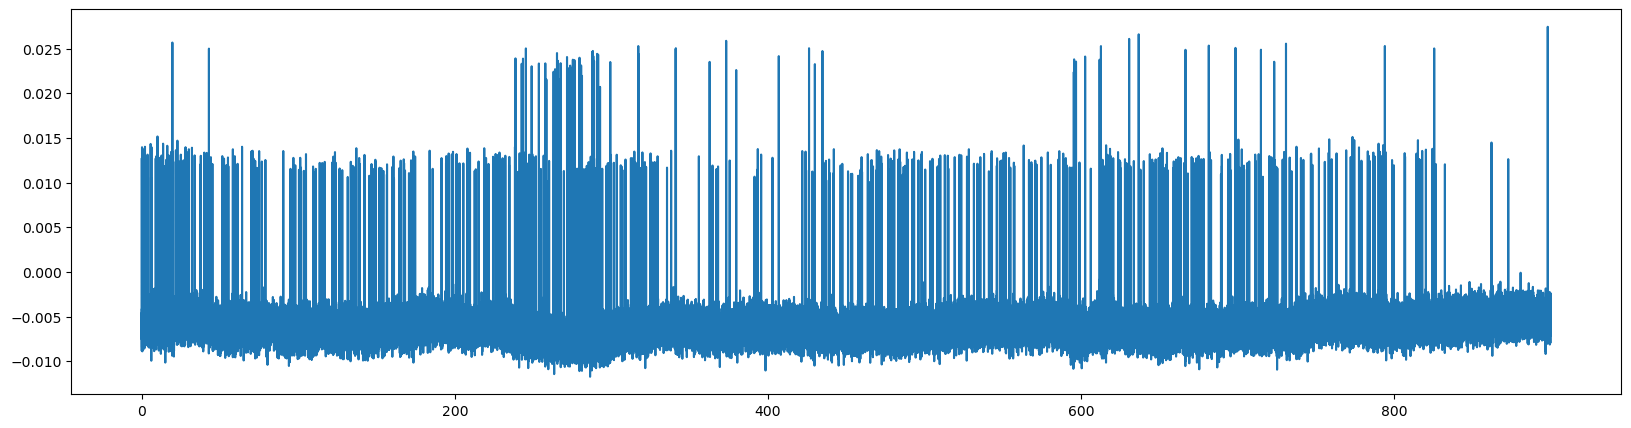

In [37]:
fig = plt.figure(figsize=(20, 5))
plt.plot(tracking_df['t'], tracking_df['tail_sum'])

'2023-09-13T17:46:53.684652'